In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
restaurant = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\RestaurantVisitors.csv', index_col='date', parse_dates=True)
restaurant.index.freq = 'D'

In [3]:
restaurant

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
restaurant.dropna(inplace=True)

In [6]:
restaurant.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [7]:
columns = ['rest1', 'rest2', 'rest3','rest4']

In [8]:
for col in columns:
    restaurant[col] = restaurant[col].astype(int)

#restaurant['rest1'] = restaurant['rest1'].astype(int) -- This is for refrence
#restaurant['rest2'] = restaurant['rest2'].astype(int)   

In [9]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    int32  
 4   rest2         478 non-null    int32  
 5   rest3         478 non-null    int32  
 6   rest4         478 non-null    int32  
 7   total         478 non-null    float64
dtypes: float64(1), int32(4), int64(1), object(2)
memory usage: 26.1+ KB


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

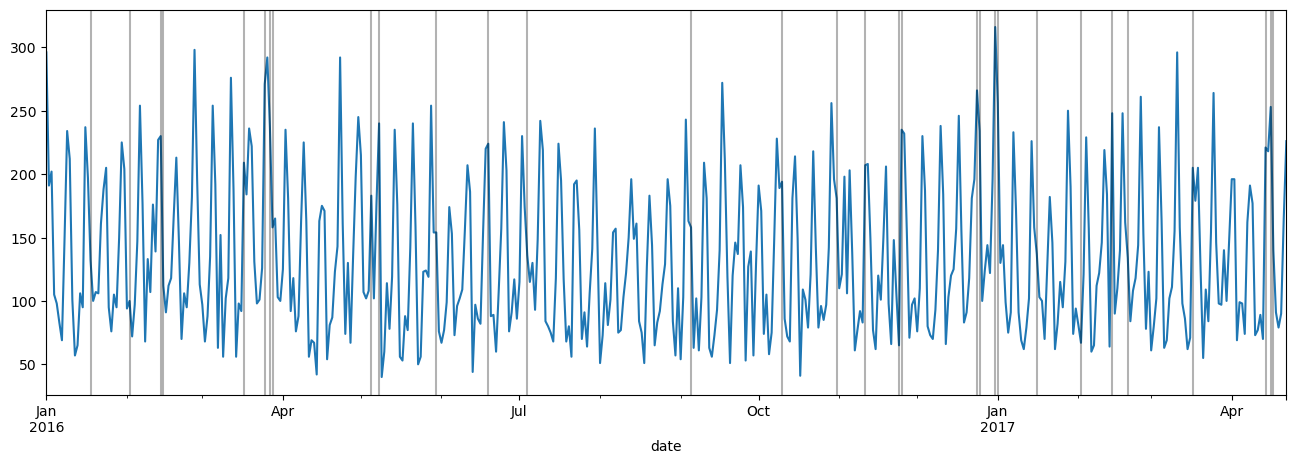

In [11]:
ax = restaurant['total'].plot(figsize=(16,5))

for x in restaurant.query('holiday==1').index:
    ax.axvline(x=x, color='black', alpha = 0.3)

In [12]:
restaurant.query('holiday==1')

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296.0
2016-01-18,Monday,1,Martin Luther King Day,10,19,19,84,132.0
2016-02-02,Tuesday,1,Groundhog Day,43,6,19,32,100.0
2016-02-14,Sunday,1,Valentine's Day,30,32,47,121,230.0
2016-02-15,Monday,1,Presidents Day,7,32,30,43,112.0
2016-03-17,Thursday,1,St. Patrick's Day,67,22,65,55,209.0
2016-03-25,Friday,1,Good Friday,75,91,64,41,271.0
2016-03-27,Sunday,1,Easter,25,61,47,104,237.0
2016-03-28,Monday,1,Easter Monday,35,21,58,44,158.0


In [13]:
restaurant.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

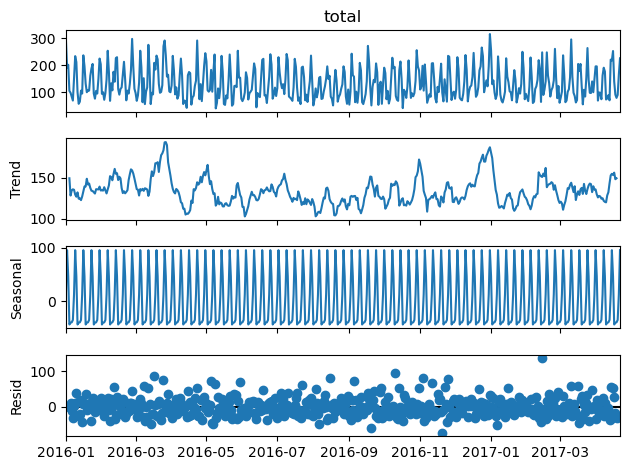

In [14]:
result = seasonal_decompose(restaurant['total'])
result.plot();

In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [16]:
adf_test(restaurant['total'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -5.592497
p-value                   0.000001
# lags used              18.000000
# observations          459.000000
critical value (1%)      -3.444677
critical value (5%)      -2.867857
critical value (10%)     -2.570135
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [17]:
auto_arima(restaurant['total'], seasonal=True, m=7, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.42 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=1.08 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4807.841, Time=0.88 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.47 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4951.827, Time=1.55 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.62 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4792.787, Time=0.59 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5093.13

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2392.393
Date:                   Sat, 09 Mar 2024   AIC                           4792.787
Time:                           14:16:24   BIC                           4809.465
Sample:                       01-01-2016   HQIC                          4799.344
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.5681      1.962      3.858      0.000       3.723      11.413
ar.S.L7        0.9458      0.014     69.436      0.000       0.919       0.973
ma.S.L7       -0.6268      0.048    -13.109      0.000      -0.720      -0.533
sigma2      1178.2454     66.492     17.720      0.000    1047.924    1308.566
===================================================================================
Ljung-Box (L1) (Q):                  14.52   Jarque-Bera (JB):                43.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.61
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
train = restaurant.iloc[:436]
test = restaurant.iloc[436:]

In [44]:
model = SARIMAX(train['total'], order = (0,0,0), seasonal_order=(1,0,1,7), enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Sat, 09 Mar 2024   AIC                           4336.738
Time:                           18:11:37   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.56e-05   1.05e+04      0.000       1.000       1.000
ma.S.L7       -0.9384      0.024    -39.208      0.000      -0.985      -0.891
sigma2      1111.7983     58.740     18.927      0.000     996.670    1226.927
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
start = len(train)
end = len(train) + len(test) - 1
predictions_1 = results.predict(start = start, end = end, dynamic = False).rename('SARIMA(0,0,0)(1,0,1,7)')

In [47]:
predictions_1

2017-03-12    172.107870
2017-03-13     87.862461
2017-03-14     99.904312
2017-03-15     96.839744
2017-03-16     98.639344
2017-03-17    140.730768
2017-03-18    235.744959
2017-03-19    172.090509
2017-03-20     87.853598
2017-03-21     99.894234
2017-03-22     96.829976
2017-03-23     98.629394
2017-03-24    140.716572
2017-03-25    235.721178
2017-03-26    172.073149
2017-03-27     87.844736
2017-03-28     99.884157
2017-03-29     96.820208
2017-03-30     98.619445
2017-03-31    140.702377
2017-04-01    235.697400
2017-04-02    172.055791
2017-04-03     87.835875
2017-04-04     99.874081
2017-04-05     96.810441
2017-04-06     98.609496
2017-04-07    140.688184
2017-04-08    235.673624
2017-04-09    172.038435
2017-04-10     87.827014
2017-04-11     99.864006
2017-04-12     96.800675
2017-04-13     98.599549
2017-04-14    140.673992
2017-04-15    235.649850
2017-04-16    172.021080
2017-04-17     87.818155
2017-04-18     99.853932
2017-04-19     96.790910
2017-04-20     98.589603


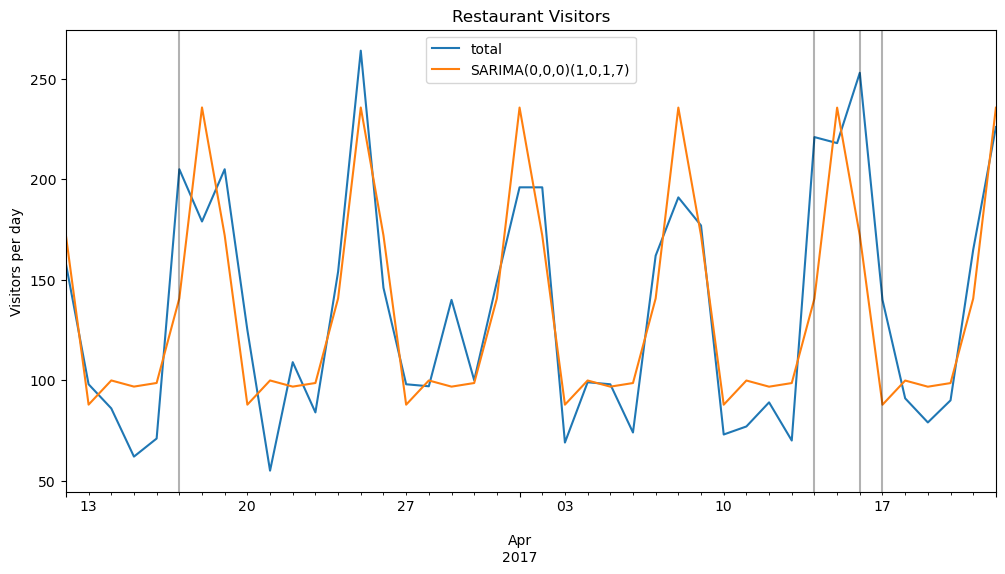

In [48]:
# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions_1.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

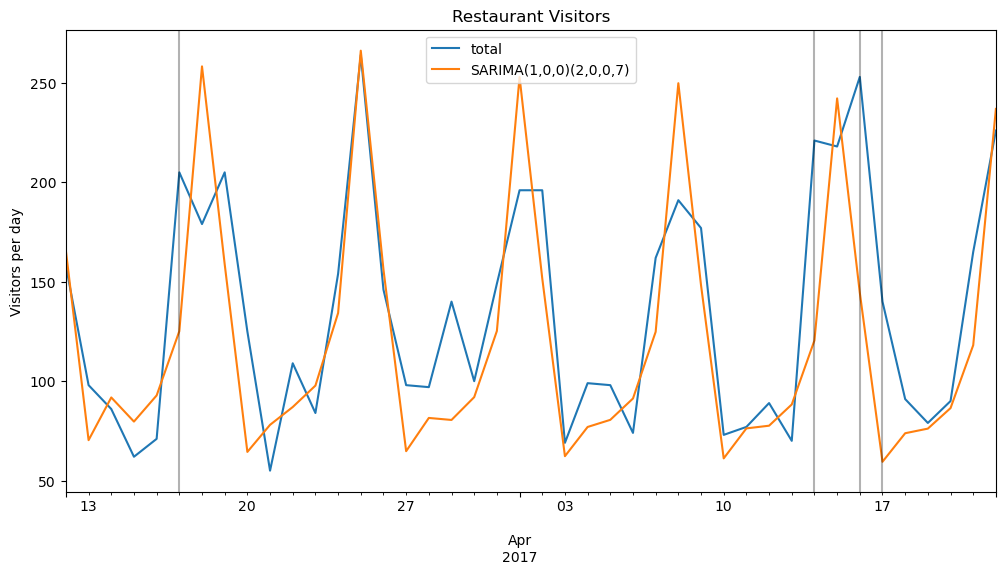

In [49]:
model = SARIMAX(train['total'], order = (1,0,0), seasonal_order=(2,0,0,7), enforce_invertibility=False)
results = model.fit()

start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False).rename('SARIMA(1,0,0)(2,0,0,7)')

title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

<Axes: xlabel='date'>

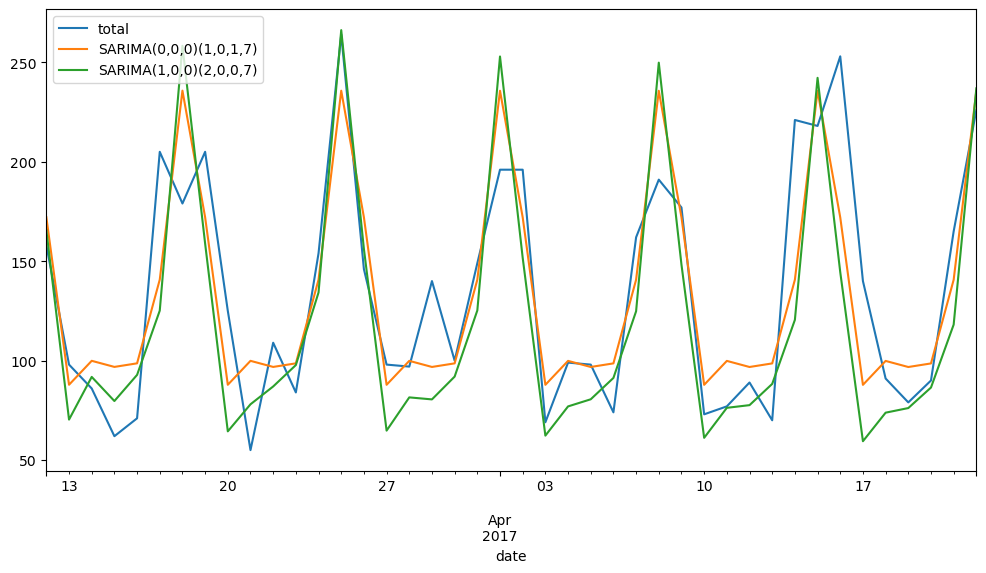

In [25]:
ax = test['total'].plot(legend=True,figsize=(12,6))
predictions_1.plot(legend = True)
predictions.plot(legend=True)

In [ ]:
predictions_1

2017-03-12    172.107870
2017-03-13     87.862461
2017-03-14     99.904312
2017-03-15     96.839744
2017-03-16     98.639344
2017-03-17    140.730768
2017-03-18    235.744959
2017-03-19    172.090509
2017-03-20     87.853598
2017-03-21     99.894234
2017-03-22     96.829976
2017-03-23     98.629394
2017-03-24    140.716572
2017-03-25    235.721178
2017-03-26    172.073149
2017-03-27     87.844736
2017-03-28     99.884157
2017-03-29     96.820208
2017-03-30     98.619445
2017-03-31    140.702377
2017-04-01    235.697400
2017-04-02    172.055791
2017-04-03     87.835875
2017-04-04     99.874081
2017-04-05     96.810441
2017-04-06     98.609496
2017-04-07    140.688184
2017-04-08    235.673624
2017-04-09    172.038435
2017-04-10     87.827014
2017-04-11     99.864006
2017-04-12     96.800675
2017-04-13     98.599549
2017-04-14    140.673992
2017-04-15    235.649850
2017-04-16    172.021080
2017-04-17     87.818155
2017-04-18     99.853932
2017-04-19     96.790910
2017-04-20     98.589603


In [ ]:
predictions - predictions_1

2017-03-12    -6.562081
2017-03-13   -17.514976
2017-03-14    -8.091371
2017-03-15   -17.154626
2017-03-16    -5.811613
2017-03-17   -15.584013
2017-03-18    22.542898
2017-03-19   -13.250109
2017-03-20   -23.416020
2017-03-21   -21.843306
2017-03-22    -9.824967
2017-03-23    -0.852926
2017-03-24    -6.449042
2017-03-25    30.457852
2017-03-26   -15.921219
2017-03-27   -23.038764
2017-03-28   -18.366397
2017-03-29   -16.316148
2017-03-30    -6.649617
2017-03-31   -15.472142
2017-04-01    17.226902
2017-04-02   -20.332340
2017-04-03   -25.546691
2017-04-04   -22.895964
2017-04-05   -16.249810
2017-04-06    -7.316157
2017-04-07   -15.861872
2017-04-08    14.148842
2017-04-09   -23.787076
2017-04-10   -26.643677
2017-04-11   -23.598697
2017-04-12   -19.185076
2017-04-13   -10.304830
2017-04-14   -20.186061
2017-04-15     6.539021
2017-04-16   -27.553473
2017-04-17   -28.345988
2017-04-18   -26.026081
2017-04-19   -20.640629
2017-04-20   -12.122653
2017-04-21   -22.553340
2017-04-22     1

In [26]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['total'], predictions)
error2 = rmse(test['total'], predictions)

print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2:11.10}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 1702.647956
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 41.26315495


In [27]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['total'], predictions_1)
error2 = rmse(test['total'], predictions_1)

print(f'SARIMA(0,0,0)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(0,0,0)(1,0,1,7) RMSE Error: {error2:11.10}')

SARIMA(0,0,0)(1,0,1,7) MSE Error: 1018.390599
SARIMA(0,0,0)(1,0,1,7) RMSE Error: 31.91223274


In [32]:
restaurant['Max'] = restaurant['total'].max()

In [35]:
restaurant

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,Max
date,,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296.0,316.0
2016-01-02,Saturday,0,na,24,39,43,85,191.0,316.0
2016-01-03,Sunday,0,na,24,31,66,81,202.0,316.0
2016-01-04,Monday,0,na,23,18,32,32,105.0,316.0
2016-01-05,Tuesday,0,na,2,15,38,43,98.0,316.0
...,...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30,30,13,18,91.0,316.0
2017-04-19,Wednesday,0,na,20,11,30,18,79.0,316.0
2017-04-20,Thursday,0,na,22,3,19,46,90.0,316.0


In [54]:
model = SARIMAX(train['total'],exog=train['holiday'],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2098.580
Date:                   Sat, 09 Mar 2024   AIC                           4205.160
Time:                           18:12:47   BIC                           4221.470
Sample:                       01-01-2016   HQIC                          4211.596
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       70.0743      3.972     17.640      0.000      62.288      77.860
ar.S.L7        1.0000   4.72e-05   2.12e+04      0.000       1.000       1.000
ma.S.L7       -1.0463      0.024    -42.752      0.000      -1.094      -0.998
sigma2       739.3318     49.501     14.936      0.000     642.311     836.353
===================================================================================
Ljung-Box (L1) (Q):                  15.36   Jarque-Bera (JB):                21.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.23
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['holiday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(0,0,0)(1,0,1,7) Predictions')

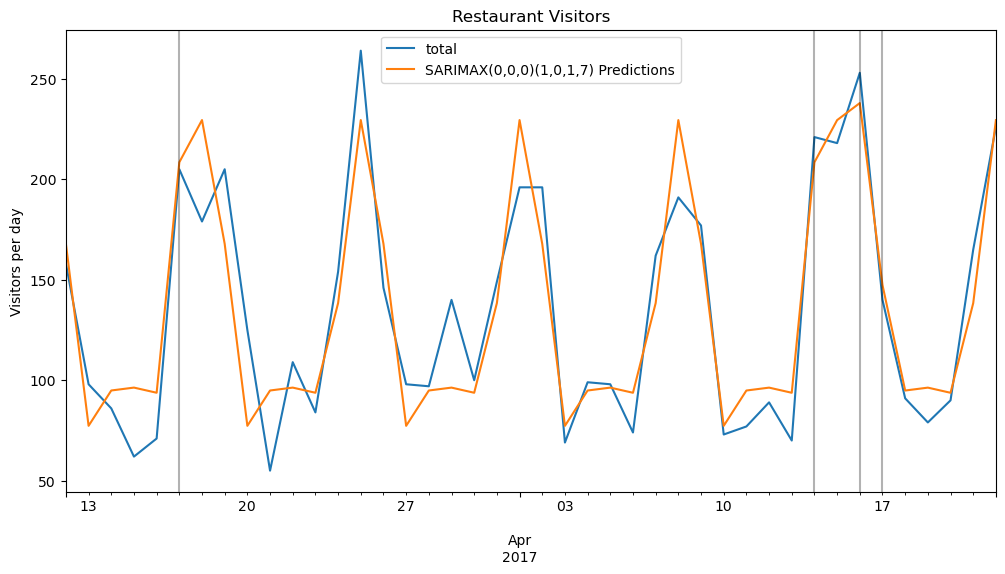

In [56]:
# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

In [57]:
# Print values from SARIMA above
print(f'SARIMA(0,0,0)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(0,0,0)(1,0,1,7) RMSE Error: {error2:11.10}')
print()

error1x = mse(test['total'], predictions_1)
error2x = rmse(test['total'], predictions)

# Print new SARIMAX values
print(f'SARIMAX_with_exog(0,0,0)(1,0,1,7) MSE Error: {error1x:11.10}')
print(f'SARIMAX_with_exog(0,0,0)(1,0,1,7) RMSE Error: {error2x:11.10}')

SARIMA(0,0,0)(1,0,1,7) MSE Error: 1018.390599
SARIMA(0,0,0)(1,0,1,7) RMSE Error: 31.91223274

SARIMAX_with_exog(0,0,0)(1,0,1,7) MSE Error: 1018.390599
SARIMAX_with_exog(0,0,0)(1,0,1,7) RMSE Error: 22.81144731
